<a href="https://colab.research.google.com/github/SeungHyunKee/MS-ai-school/blob/main/Day8_1%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9Dsh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망
실제 인간의 뇌에서 수행되는 신경망 방식을 사용한 컴퓨터 연산 방법   
실제 뇌에서 뉴런간 정보 전달 방식을 모델링한 것

## 퍼셉트론
신경망의 한 종류   

입력값 X 를 가중치와 곱해서 모두 더한 값이 임계값 기준이 있는 노드

In [4]:
import pandas as pd
data = pd.read_csv('data.csv')

In [5]:
data

,x1,x2,y
0,True,True,False
1,True,False,True
2,True,False,True
3,True,True,False
4,True,True,False
...,...,...,...
995,True,True,False
996,True,True,False
997,False,True,True
998,False,False,False


In [6]:
# import torch  # 파이토치
# import pandas as pd
# from torch import nn
# from torch import optim
# from torch.utils.data import Dataset, DataLoader

In [8]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values 
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()
  # 하나의모덷ㄹ 생성하는것
    self.layer = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()   # sigmoid통해 y결과값 나옴
    )

  def forward(self, x):
    x = self.layer(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)
# batch : 한번에 몇개를 넣을건지
# drop : 데이터 중간에 몇개를 뺄건지

device = 'cuda' if torch.cuda.is_available() else 'cpu'  # is_available() : Gpu 사용 할건지
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)
# optimizer : 가중치 최적화시킬때 사용

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)

cpu


<ipython-input-8-7dbc38a0a036>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
<ipython-input-8-7dbc38a0a036>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.692
Epoch : 2000, Cost : 0.692
Epoch : 3000, Cost : 0.692
Epoch : 4000, Cost : 0.692
Epoch : 5000, Cost : 0.692
Epoch : 6000, Cost : 0.692
Epoch : 7000, Cost : 0.692
Epoch : 8000, Cost : 0.692
Epoch : 9000, Cost : 0.692
Epoch : 10000, Cost : 0.692
tensor([[0.4667],
        [0.4984],
        [0.5031],
        [0.5348]])


In [9]:
class fruit():
  def __init__(self) -> None:
    self.cnt = 0
    self.name = []

  def add_fruit(self, name, size):
     self.name.append(name)
     self.cnt += 1
     return True

  def __len__(self):
    return len(self.cnt)
    # self :다른함수에서도 사용할수있게 하는것

  def get_item(self):
    return self._name

  def __len__(self):
    return self._cnt

In [10]:
fruit_class = fruit()

In [11]:
fruit_class.add_fruit('apple',10)
fruit_class.add_fruit('banana',10)
fruit_class.add_fruit('orange',10)

True

In [ ]:
len(fruit_class)

In [ ]:
dir(fruit_class)

In [ ]:
fruit_class.get_item()

In [15]:
fruit_class.name = ['1','2','3']

In [16]:
fruit_class.name

['1', '2', '3']

### 다층퍼셉트론 모델

In [17]:
import torch
import pandas as pd
from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self, file_path):
    df = pd.read_csv(file_path)
    self.x1 = df.iloc[:, 0].values
    self.x2 = df.iloc[:,1].values
    self.y = df.iloc[:,2].values
    self.length = len(df)

  def __getitem__(self, index):
    x = torch.FloatTensor([self.x1[index], self.x2[index]])
    y = torch.FloatTensor([self.y[index]])
    return x,y

  def __len__(self):
    return self.length


class CustomModel(nn.Module):
  def __init__(self):
    super(CustomModel, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid()
    )
    self.layer2 = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )

  def forward(self, x):
    x = self.layer1(x)
    x = self.layer2(x)
    return x

train_dataset = CustomDataset('data.csv')
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

model = CustomModel().to(device)
criterion = nn.BCELoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(10000):
  cost = 0.0
  for x,y in train_dataloader:
    x = x.to(device)
    y = y.to(device)

    output = model(x)
    loss = criterion(output, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    cost += loss

  cost = cost/len(train_dataloader)

  if (epoch + 1) % 1000 ==0:
    print(f'Epoch : {epoch+1:4d}, Cost : {cost:.3f}')

with torch.no_grad():
  model.eval()
  input = torch.FloatTensor([
      [0,0],
      [0,1],
      [1,0],
      [1,1]
  ]).to(device)

  outputs = model(input)

print(outputs)
print(outputs<=0.5)

cpu


<ipython-input-17-d56e187ed7d0>:16: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  x = torch.FloatTensor([self.x1[index], self.x2[index]])
<ipython-input-17-d56e187ed7d0>:17: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  y = torch.FloatTensor([self.y[index]])


Epoch : 1000, Cost : 0.670
Epoch : 2000, Cost : 0.504
Epoch : 3000, Cost : 0.374
Epoch : 4000, Cost : 0.096
Epoch : 5000, Cost : 0.042
Epoch : 6000, Cost : 0.026
Epoch : 7000, Cost : 0.019
Epoch : 8000, Cost : 0.015
Epoch : 9000, Cost : 0.012
Epoch : 10000, Cost : 0.010
tensor([[0.0075],
        [0.9910],
        [0.9909],
        [0.0153]])
tensor([[ True],
        [False],
        [False],
        [ True]])


# sigmoid함수 그려보기


In [18]:
!pip install koreanize-matplotlib
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.2 MB/s 


<ipython-input-19-26971bb9f972>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x >0, dtype=np.int)


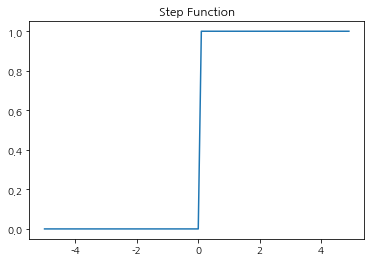

In [19]:
def step(x):
  return np.array(x >0, dtype=np.int)

x = np.arange(-5.0,5.0,0.1)
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()

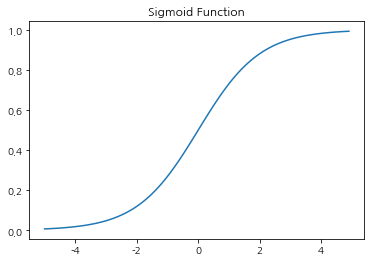

In [20]:
# 시크모이드 함수
def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.title('Sigmoid Function')
plt.show()

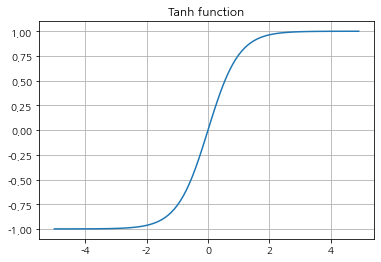

In [21]:
x = np.arange(-5.0,5.0,0.1)
y = np.tanh(x)
plt.plot(x,y)
plt.grid()
plt.title('Tanh function')
plt.show()

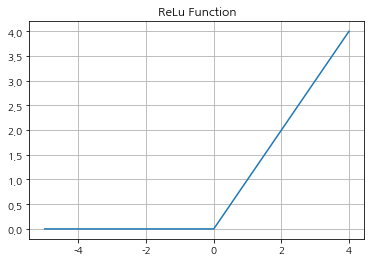

In [22]:
# Relu 함수 : (가장많이사용됨)

def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0,1)
plt.plot(x, relu(x))
plt.grid()
plt.title('ReLu Function')
plt.show()

# 입력값이 음수인경우 : 0으로, 정보가 사라지게 됨
# 이런 특성의 보완을 위해 : leaky 함수가 나옴

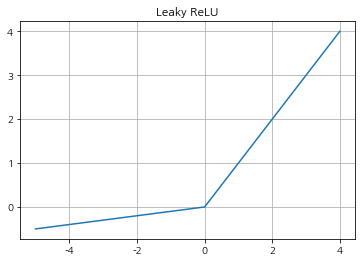

In [23]:
a = 0.1

def leaky_relu(x):
  return np.maximum(a*x, x)

plt.plot(x, leaky_relu(x))
plt.grid()
plt.title('Leaky ReLU')
plt.show()

# ReLU 함수는 y값이 0인 직선부분이 길었지만, 이와는 다르게 
# Leaky Relu 함수에서는 이 직선의 기울기가 생긴것을 볼수있음

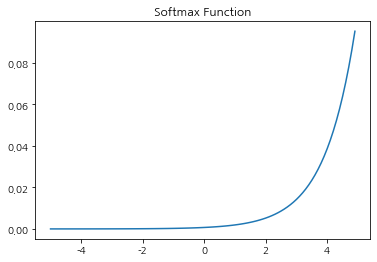

In [24]:
# 여러가지 클래스를 구분할때 출력 레이어에 사용 : softmax

# Softmax
x = np.arange(-5.0,5.0,0.1)
y = np.exp(x)/np.sum(np.exp(x))

plt.plot(x,y)
plt.title('Softmax Function')
plt.show()

# K-Nearest Neighbors

새로운 데이터(x)와 가장 가까운 k개의 데이터를 통해 x를 분류하는 방법   

- euclidean distance
$$\sqrt{(x_1-μ_1)^2 + (x_2-μ_2)^2+ ⋯ + (x_p-μ_p)^2}$$

- manhattan distance
$$|x_1-μ_1|+|x_2-μ_2|+⋯+|x_p-μ_p|$$

      변수의 값이 가지는 스케일의 차이가 모델 학습에 영향을 미치는 것을 막기 위해 스케일링 수행이 필요
      각 변수의 값 차이가 가졌던 정보는 남아있돌록 

In [25]:
# 가장가까운 데이터 분류해주는 모델 만들기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sklearn as sc

In [28]:
mobile_price = pd.read_csv('train.csv')
print(mobile_price.shape)
mobile_price.head()

(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [29]:
mobile_price['price_range'].unique()

array([1, 2, 3, 0])

In [30]:
mobile_price.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [31]:
# 전처리 작업
columns = mobile_price.columns

X = mobile_price[columns]
# price : 예측하려고하는 y값 = x에서 빼주기
y = mobile_price[columns[-1]]

SC = StandardScaler()
X = SC.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=0)


In [32]:
print(len(x_train),len(x_test))

1800 200


In [33]:
# 모델 생성

for i in range(1, 12):
  knn_model=KNeighborsClassifier(n_neighbors=i,
                                metric='manhattan').fit(x_train, y_train)
  print(knn_model.score(x_train, y_train))
  print(knn_model.score(x_test, y_test))
  

1.0
0.675
0.86
0.67
0.9088888888888889
0.745
0.9066666666666666
0.79
0.9105555555555556
0.84
0.91
0.865
0.9277777777777778
0.855
0.9266666666666666
0.87
0.9327777777777778
0.885
0.9394444444444444
0.9
0.9405555555555556
0.905


In [34]:
  # 위의 결과를 보고 젤 확률 높은 n=8일때 값을 가져옴
  
  knn_model=KNeighborsClassifier(n_neighbors=8,
                                metric='manhattan').fit(x_train, y_train)

In [35]:
knn_model.predict_proba(x_test)[0]

array([0.  , 0.  , 0.25, 0.75])

In [36]:
knn_model.predict(x_test)[0]
# 결과는 위의 array([0.  , 0.  , 0.25, 0.75]) 에서 젤 높은 0.75자리인 3(라벨링값) 이 나옴

3